<a href="https://colab.research.google.com/github/Nunez350/DataScienceAndAnalytics/blob/main/Logistic_Regression_DMD_XPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls /content/

df_train.csv  loans.csv  sample_data


In [75]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


# New Section

In [76]:
import chardet
import pandas as pd
!ls /content/
# drive.mount('/content/drive')
# Check the first few bytes of the file to guess the file type
file_path = "/content/drive/MyDrive/Datasets/loans.csv"  # Adjust the file path as necessary
# df = pd.read_csv('loans.csv')

# with open(file_path, 'rb') as file:
#     header = file.read(100)
#     print(header)

# # Try reading the file with the detected encoding
# try:
#     df = pd.read_excel(file_path)
#     print(data.head())
# except Exception as e:
#     print(f"Error reading the file with detected encoding: {e}")

df_train.csv  drive  loans.csv	sample_data


In [ ]:
pip install skimpy

In [96]:
#imports packages to be used in the code
import numpy as np
import codecs
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as skl
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from skimpy import skim

print(skl.__version__)

# df = pd.read_excel(file_path)
df

1.2.2


,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
...,...,...,...,...,...,...,...
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0


In [97]:
!pip install wget

In [98]:
# shows first 6 rows of dataframe
df.head(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
5,0,125,5.17,727,50.81,0,0


In [99]:
print(df)

      default  installment  log_income  fico_score  rev_balance  inquiries  \
0           0          829        4.93         737        28.85          0   
1           0          228        4.81         707        33.62          0   
2           0          367        4.51         682         3.51          1   
3           0          162        4.93         712        33.67          1   
4           0          103        4.91         667         4.74          0   
...       ...          ...         ...         ...          ...        ...   
9511        1          345        5.29         672       215.37          2   
9512        1          258        4.84         722         0.18          5   
9513        1           98        4.60         687        10.04          8   
9514        1          352        4.70         692         0.00          5   
9515        1          853        4.89         732        37.88          6   

      records  
0           0  
1           0  
2           0  

# shows last 6 rows of dataframe
df.tail(6)

In [100]:
df.tail(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
9510,1,70,4.39,662,3.00,6,0
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0
9515,1,853,4.89,732,37.88,6,0


Separate files into Default and No Default

In [101]:
default = df.loc[df['default']==1]
no_default = df.loc[df['default']==0]
skim(default)
skim(no_default)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1521   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │        1 │       0 │     1 │     1 │     1 │     1 │      1 │     ▇   │  │
│ │ installment       │    0 │       0 │      340 │     220 │    16 │   170 │   290 │   490 │    930 │ ▆▇▅▃▂▂  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.29 │   3.3 │   4.6 │   4.7 │   4.9 │    5.8 │    ▃▇▂  │  │
│ │ fico_score        │    0 │       0 │      700 │      34 │   620 │   670 │   690 │   720 │    820 │  ▁▇▇▃▁  │  │
│ │ rev_balance       │    0 │       0 │       21 │      50 │     0 │   3.4 │   8.9 │    21 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      2.3 │     2.9 │     0 │     0 │     1 │     3 │     33 │   ▇▁    │  │
│ │ records           │    0 │       0 │    0.092 │    0.29 │     0 │     0 │     0 │     0 │      2 │  ▇  ▁   │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7995   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │        0 │       0 │     0 │     0 │     0 │     0 │      0 │     ▇   │  │
│ │ installment       │    0 │       0 │      320 │     200 │    16 │   160 │   270 │   430 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.8 │    0.26 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │    ▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │  ▆▇▆▃▁  │  │
│ │ rev_balance       │    0 │       0 │       16 │      30 │     0 │   3.2 │   8.6 │    18 │    950 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.4 │       2 │     0 │     0 │     1 │     2 │     31 │    ▇    │  │
│ │ records           │    0 │       0 │    0.057 │    0.26 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Let's get a sense of the dataset using 'skim' just like we did for Linear Regression

In [102]:
# skim() provides visual summary of dataframe
skim(df)
#16% of the data set defaults


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9516   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │     0.16 │    0.37 │     0 │     0 │     0 │     0 │      1 │ ▇    ▂  │  │
│ │ installment       │    0 │       0 │      320 │     210 │    16 │   160 │   270 │   440 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.27 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │   ▁▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │ ▁▆▇▅▃▁  │  │
│ │ rev_balance       │    0 │       0 │       17 │      34 │     0 │   3.3 │   8.7 │    18 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.6 │     2.2 │     0 │     0 │     1 │     2 │     33 │    ▇    │  │
│ │ records           │    0 │       0 │    0.062 │    0.26 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [103]:
means = df.groupby('default')[['rev_balance', 'fico_score']].mean()
print(means)


         rev_balance  fico_score
default                         
0          16.181555  713.307067
1          21.232939  697.884287


In [104]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df['default'])
df['default'] = label_encoder.transform(df['default'])

#strategy_type = CategoricalDtype(categories=['Sell', 'Buy', 'Hold'], ordered=True)
#df['Strategy'] = df['Strategy'].astype(strategy_type)
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9516   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │     0.16 │    0.37 │     0 │     0 │     0 │     0 │      1 │ ▇    ▂  │  │
│ │ installment       │    0 │       0 │      320 │     210 │    16 │   160 │   270 │   440 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.27 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │   ▁▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │ ▁▆▇▅▃▁  │  │
│ │ rev_balance       │    0 │       0 │       17 │      34 │     0 │   3.3 │   8.7 │    18 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.6 │     2.2 │     0 │     0 │     1 │     2 │     33 │    ▇    │  │
│ │ records           │    0 │       0 │    0.062 │    0.26 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Lets compare the data we have for borrowers who defaulted vs. borrowers who did not, again by skimming the data corresponding to those respective subsets.

In [105]:
# prompt:

df_default = df[df['default'] == 1]
df_no_default = df[df['default'] == 0]
skim(df_default)
skim(df_no_default)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1521   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │        1 │       0 │     1 │     1 │     1 │     1 │      1 │     ▇   │  │
│ │ installment       │    0 │       0 │      340 │     220 │    16 │   170 │   290 │   490 │    930 │ ▆▇▅▃▂▂  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.29 │   3.3 │   4.6 │   4.7 │   4.9 │    5.8 │    ▃▇▂  │  │
│ │ fico_score        │    0 │       0 │      700 │      34 │   620 │   670 │   690 │   720 │    820 │  ▁▇▇▃▁  │  │
│ │ rev_balance       │    0 │       0 │       21 │      50 │     0 │   3.4 │   8.9 │    21 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      2.3 │     2.9 │     0 │     0 │     1 │     3 │     33 │   ▇▁    │  │
│ │ records           │    0 │       0 │    0.092 │    0.29 │     0 │     0 │     0 │     0 │      2 │  ▇  ▁   │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7995   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │        0 │       0 │     0 │     0 │     0 │     0 │      0 │     ▇   │  │
│ │ installment       │    0 │       0 │      320 │     200 │    16 │   160 │   270 │   430 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.8 │    0.26 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │    ▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │  ▆▇▆▃▁  │  │
│ │ rev_balance       │    0 │       0 │       16 │      30 │     0 │   3.2 │   8.6 │    18 │    950 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.4 │       2 │     0 │     0 │     1 │     2 │     31 │    ▇    │  │
│ │ records           │    0 │       0 │    0.057 │    0.26 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [106]:
# subset dataframe for default is 0
# 0=Buy, 1=Hold, 2=Sell
skim(df[df['default']==0])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7995   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │        0 │       0 │     0 │     0 │     0 │     0 │      0 │     ▇   │  │
│ │ installment       │    0 │       0 │      320 │     200 │    16 │   160 │   270 │   430 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.8 │    0.26 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │    ▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │  ▆▇▆▃▁  │  │
│ │ rev_balance       │    0 │       0 │       16 │      30 │     0 │   3.2 │   8.6 │    18 │    950 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.4 │       2 │     0 │     0 │     1 │     2 │     31 │    ▇    │  │
│ │ records           │    0 │       0 │    0.057 │    0.26 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [107]:
# subset dataframe for default is 1
skim(df[df['default']==1])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1521   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │        1 │       0 │     1 │     1 │     1 │     1 │      1 │     ▇   │  │
│ │ installment       │    0 │       0 │      340 │     220 │    16 │   170 │   290 │   490 │    930 │ ▆▇▅▃▂▂  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.29 │   3.3 │   4.6 │   4.7 │   4.9 │    5.8 │    ▃▇▂  │  │
│ │ fico_score        │    0 │       0 │      700 │      34 │   620 │   670 │   690 │   720 │    820 │  ▁▇▇▃▁  │  │
│ │ rev_balance       │    0 │       0 │       21 │      50 │     0 │   3.4 │   8.9 │    21 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      2.3 │     2.9 │     0 │     0 │     1 │     3 │     33 │   ▇▁    │  │
│ │ records           │    0 │       0 │    0.092 │    0.29 │     0 │     0 │     0 │     0 │      2 │  ▇  ▁   │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Lets take a look at defaults vs. inquiries via a scatter plot, just like we did for Blue Bike rentals vs. temeperature when we looked at Linear Regression. Shows binary nature variable of target variable.

Text(0, 0.5, 'inquiries')

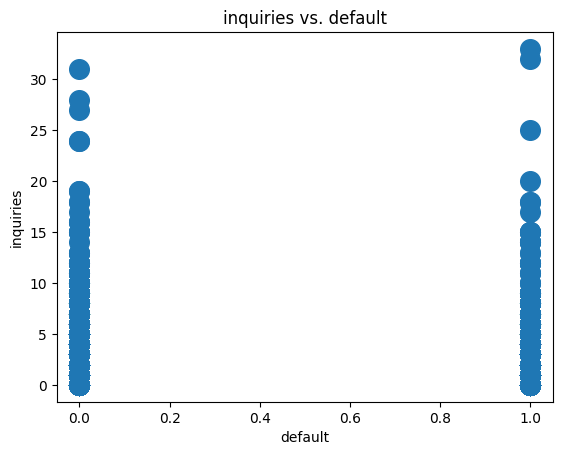

In [112]:
# plot target variable
# plt.scatter(df['default'], df['inquiries'],alpha =0.0, s=200)
plt.scatter(df['default'], df['inquiries'], alpha=1.0, s=200)
plt.title('inquiries vs. default')
plt.xlabel('default')
plt.ylabel('inquiries')

## **Logistic Regression in Python**

Lets begin by splitting the data into a training set (on which we will train our model) and a test sert (on which we will evaulate it).

### **Split Data**

In [113]:
# data split into 70% train and 30% test
df_train, df_test = train_test_split(df, test_size=0.3)

In [114]:
print(df_train)
# Save the DataFrame to a CSV file
# Replace 'file_path' with the path where you want to save the file
file_path = 'df_train.csv'
df_train.to_csv(file_path, index=False)

      default  installment  log_income  fico_score  rev_balance  inquiries  \
5695        0          616        5.03         722         0.12          1   
3468        0          442        4.63         742        28.08          1   
1519        0          197        4.81         697         2.61          0   
7888        0          239        4.65         652         0.00          1   
5964        0          158        4.78         772         2.93          5   
...       ...          ...         ...         ...          ...        ...   
7289        0          269        5.62         702        10.57          1   
6944        0          331        5.26         677        57.86          1   
6838        0          462        4.53         687        14.71          0   
4850        0          161        4.40         787        44.83          0   
1074        0           96        4.41         717         1.06          0   

      records  
5695        0  
3468        0  
1519        0  

Lets skim the train and test data. You will notice -- as we hope -- that the two datasets have very similar statistics

In [115]:
'''
Here is the skimpy summary of the training data:

Number of rows: 6661
Number of columns: 7
Data Types: 5 columns of type 'int64' and 2 columns of type 'float64'
NA values: No missing values in the training data
Numeric columns and their summary statistics (mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum) for each column:
default: 16% of the data set defaults
installment: Mean of 320, with values ranging from 16 to 930
log_income: Mean of 4.7, with values ranging from 3.3 to 6.3
fico_score: Mean of 710, with values ranging from 610 to 820
rev_balance: Mean of 17, with values ranging from 0 to 1200
inquiries: Mean of 1.6, with values ranging from 0 to 33
records: Mean of 0.063, with values ranging from 0 to 5
'''
skim(df_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6661   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │     0.16 │    0.37 │     0 │     0 │     0 │     0 │      1 │ ▇    ▂  │  │
│ │ installment       │    0 │       0 │      320 │     210 │    16 │   160 │   270 │   430 │    930 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.27 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │   ▁▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │ ▁▆▇▅▃▁  │  │
│ │ rev_balance       │    0 │       0 │       17 │      35 │     0 │   3.3 │   8.7 │    18 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.6 │     2.2 │     0 │     0 │     1 │     2 │     33 │    ▇    │  │
│ │ records           │    0 │       0 │    0.061 │    0.26 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [116]:
'''
Here is the skimpy summary of the test data:

Number of rows: 2855
Number of columns: 7
Data Types: 5 columns of type 'int64' and 2 columns of type 'float64'
NA values: No missing values in the test data
Numeric columns and their summary statistics (mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum) for each column:
default: 16% of the data set defaults
installment: Mean of 320, with values ranging from 17 to 940
log_income: Mean of 4.7, with values ranging from 3.3 to 6.1
fico_score: Mean of 710, with values ranging from 610 to 830
rev_balance: Mean of 17, with values ranging from 0 to 950
inquiries: Mean of 1.5, with values ranging from 0 to 31
records: Mean of 0.061, with values ranging from 0 to 3
'''

skim(df_test)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2855   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │     0.16 │    0.37 │     0 │     0 │     0 │     0 │      1 │ ▇    ▂  │  │
│ │ installment       │    0 │       0 │      320 │     210 │    16 │   170 │   270 │   440 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.26 │   3.3 │   4.6 │   4.8 │   4.9 │    6.2 │    ▇▇▁  │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    820 │  ▅▇▆▃▁  │  │
│ │ rev_balance       │    0 │       0 │       17 │      30 │     0 │   3.2 │   8.6 │    18 │    390 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.6 │     2.3 │     0 │     0 │     1 │     2 │     32 │    ▇    │  │
│ │ records           │    0 │       0 │    0.064 │    0.26 │     0 │     0 │     0 │     0 │      3 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### ** Generate / Fit Model**

In [117]:
'''
The logistic regression results provide insights into the relationships between the dependent variable (default) and the
independent variables (installment, log_income, fico_score, rev_balance, inquiries, records). Here are some key points from the summary:

Pseudo R-squared: The Pseudo R-squared value is approximately 0.053 (0.05285), indicating that the model explains about 5.3% of the variation
in the dependent variable.

Coefficients:

Intercept: The intercept is 9.2627. This is the log-odds of the dependent variable when all independent variables are zero.
installment: For a one-unit increase in installment, the log-odds of default increase by 0.0012.
log_income: For a one-unit increase in log_income, the log-odds of default decrease by 1.0265.
fico_score: For a one-unit increase in fico_score, the log-odds of default decrease by 0.0096.
rev_balance: For a one-unit increase in rev_balance, the log-odds of default increase by 0.0041.
inquiries: For a one-unit increase in inquiries, the log-odds of default increase by 0.1309.
records: For a one-unit increase in records, the log-odds of default increase by 0.2432.
P-values: All the p-values are less than 0.05, indicating that each coefficient is statistically significant.

Likelihood Ratio Test (LLR) p-value: The LLR p-value tests whether the model, including all predictors, is significantly
better than a null model with no predictors. The very low p-value (2.433e-63) suggests that the model is statistically significant.

Overall, the logistic regression model suggests that the included variables have a significant impact on predicting the
likelihood of default.

'''
# build formula,  target (depedent variable) ~ features (indepedent variables)
formula="default ~ installment + log_income +  fico_score +  rev_balance +  inquiries + records"


# build model, fit the formula to the training data using a logistic algorithim (logit)
est = logit(formula=formula, data=df_train).fit()

# print the results of the model (est).
# Examine; Pseudo R-squared, p values, coefficients
print(est.summary())

Optimization terminated successfully.
         Current function value: 0.414591
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6654
Method:                           MLE   Df Model:                            6
Date:                Fri, 10 May 2024   Pseudo R-squ.:                 0.05449
Time:                        22:47:41   Log-Likelihood:                -2761.6
converged:                       True   LL-Null:                       -2920.7
Covariance Type:            nonrobust   LLR p-value:                 9.804e-66
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.3700      0.991      9.456      0.000       7.428      11.312
installment     0.0011    

In [118]:
'''
Each row represents an observation in the test data, and the predicted_probability column shows the model's
estimated probability of default for each observation.

the model's predicted probability of default (predicted_probability).
'''

# apply the model (est) to the test data and make predictions
preds = est.predict(df_test)
df_test['predicted_probability'] = preds

# print top 6 predicted probabilities
df_test.head(6)


,default,installment,log_income,fico_score,rev_balance,inquiries,records,predicted_probability
4360,0,398,4.96,747,11.11,4,0,0.122065
9253,0,553,4.66,752,8.81,9,0,0.286936
1570,0,458,4.93,792,4.66,0,0,0.051553
8547,0,105,4.65,657,2.83,0,0,0.160816
6231,0,214,4.77,697,6.92,0,0,0.115220
6181,0,833,4.89,742,44.79,1,0,0.164873


In [119]:
'''
I have added the 'will_default' column to the DataFrame,
indicating whether the predicted probability of default is greater than 0.5.

'''
# test for 'predicted_probability > 0.5, if yes assign will_default to 1, otherwise to 0
df_test['will_default'] = np.where(df_test['predicted_probability']>0.5, 1, 0)
df_test.head(6)
print(df_test)

      default  installment  log_income  fico_score  rev_balance  inquiries  \
4360        0          398        4.96         747        11.11          4   
9253        0          553        4.66         752         8.81          9   
1570        0          458        4.93         792         4.66          0   
8547        0          105        4.65         657         2.83          0   
6231        0          214        4.77         697         6.92          0   
...       ...          ...         ...         ...          ...        ...   
8705        1          232        5.45         682        20.21          6   
8027        0          342        4.66         697        14.55          3   
1203        0          248        4.51         692         2.13          1   
4771        0          546        4.89         687        17.92          0   
4048        1          287        4.72         692        11.84          1   

      records  predicted_probability  will_default  
4360      

In [120]:
(1202*1000)-(226*5000)
(1195+3)/(1195+223+7+3)

0.8389355742296919

### **Evaluate Model**

Accuracy:0.8371278458844134


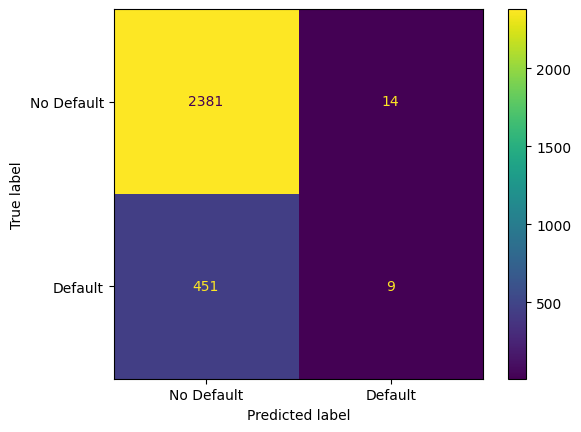

In [121]:
'''
The accuracy of your logistic regression model on the test data is approximately 83.5%.
'''
# Evaluation Metrics
# print confusion matrix with labels

ConfusionMatrixDisplay.from_predictions(df_test['default'], df_test['will_default'], display_labels = ['No Default', 'Default'])
# print accuracy
print('Accuracy:'+str(accuracy_score(df_test['default'], df_test['will_default'])))

In [122]:
cm = confusion_matrix(df_test['default'], df_test['will_default'])
print((1195+223+7+3)*1000) # 1428000
print(((223+7)*5000))      # 1150000
print(1428000-1150000)
print((1000*(1195+7))-(5000*(223+3)))
print((1000*(1195+3))-(5000*(223+7)))
cm_baseline = ((cm[0,0]+cm[0,1])*1000)-((cm[1,0]+cm[1,1])*5000)
print(cm[0,0], cm[1,0], cm[0,1], cm[1,1])
print(  0.792417062 , 0.22346368715 , 72000, 72000)
cm_baseline


1428000
1150000
278000
72000
48000
2381 451 14 9
0.792417062 0.22346368715 72000 72000


95000

In [123]:
'''

The profit at the threshold of 0.5 for the given confusion matrix is calculated based on the following formula:

Profit = (True Negatives × Profit per True Negative) − (False Positives × Loss per False Positive)

Given your specific profit and loss values of $1000 for a True Negative and -$5000 for a False Positive,
the profit at a threshold of 0.5 is calculated.

Profit at Threshold of 0.5 = $67000
'''

cm = confusion_matrix(df_test['default'], df_test['will_default'])
cm_profit = 1000*cm[0,0]-5000*cm[1,0]
print('Profit at Threshold of 0.5 = $'+str(cm_profit))

Profit at Threshold of 0.5 = $126000


In [124]:
'''

The predicted probabilities from logistic regression typically range from 0 to 1.
Setting a threshold greater than 1.0 may not be meaningful. The usual practice is to choose a threshold between 0 and 1.

If you're interested in optimizing the threshold for a specific profit or cost function,
you might want to consider using a threshold that maximizes your specific objective. You can iterate over different thresholds
 and evaluate the corresponding profits to find the optimal one for your case.

Profit at Threshold of 1.0 = $41000

'''
preds = est.predict(df_test)
df_test['predicted_probability'] = preds
df_test['will_default'] = np.where(df_test['predicted_probability']>1.0, 1, 0)
cm = confusion_matrix(df_test['default'], df_test['will_default'])
cm_profit = 1000*cm[0,0]-5000*cm[1,0]
print('Profit at Threshold of 1.0 = $'+str(cm_profit))

Profit at Threshold of 1.0 = $95000


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [126]:
!pip install tensorflow

In [127]:
TIME_STEPS = 40 # Number of previous days to use as input features
TEST_SIZE = 0.2 # Fraction of data to use as test set
THRESHOLD = 0.05 # Threshold for buy/sell/hold strategy

In [128]:
file_path=r'df_train.csv'
data = pd.read_csv(file_path)
data.head()

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,616,5.03,722,0.12,1,0
1,0,442,4.63,742,28.08,1,0
2,0,197,4.81,697,2.61,0,0
3,0,239,4.65,652,0.00,1,0
4,0,158,4.78,772,2.93,5,0


In [134]:
'''
The logistic regression results provide insights into the relationships between the dependent variable (default) and the
independent variables (installment, log_income, fico_score, rev_balance, inquiries, records). Here are some key points from the summary:

Pseudo R-squared: The Pseudo R-squared value is approximately 0.053 (0.05285), indicating that the model explains about 5.3% of the variation
in the dependent variable.

Coefficients:

Intercept: The intercept is 9.2627. This is the log-odds of the dependent variable when all independent variables are zero.
installment: For a one-unit increase in installment, the log-odds of default increase by 0.0012.
log_income: For a one-unit increase in log_income, the log-odds of default decrease by 1.0265.
fico_score: For a one-unit increase in fico_score, the log-odds of default decrease by 0.0096.
rev_balance: For a one-unit increase in rev_balance, the log-odds of default increase by 0.0041.
inquiries: For a one-unit increase in inquiries, the log-odds of default increase by 0.1309.
records: For a one-unit increase in records, the log-odds of default increase by 0.2432.
P-values: All the p-values are less than 0.05, indicating that each coefficient is statistically significant.

Likelihood Ratio Test (LLR) p-value: The LLR p-value tests whether the model, including all predictors, is significantly
better than a null model with no predictors. The very low p-value (2.433e-63) suggests that the model is statistically significant.

Overall, the logistic regression model suggests that the included variables have a significant impact on predicting the
likelihood of default.

'''
# build formula,  target (depedent variable) ~ features (indepedent variables)
#formula="Strategy ~ Volume + Open + Close"
formula="default ~ installment + log_income + fico_score + rev_balance + inquiries + records"

# build model, fit the formula to the training data using a logistic algorithim (logit)
est = logit(formula=formula, data=df_train).fit()

# print the results of the model (est).
# Examine; Pseudo R-squared, p values, coefficients
print(est.summary())


Optimization terminated successfully.
         Current function value: 0.414591
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6654
Method:                           MLE   Df Model:                            6
Date:                Fri, 10 May 2024   Pseudo R-squ.:                 0.05449
Time:                        22:50:29   Log-Likelihood:                -2761.6
converged:                       True   LL-Null:                       -2920.7
Covariance Type:            nonrobust   LLR p-value:                 9.804e-66
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.3700      0.991      9.456      0.000       7.428      11.312
installment     0.0011    

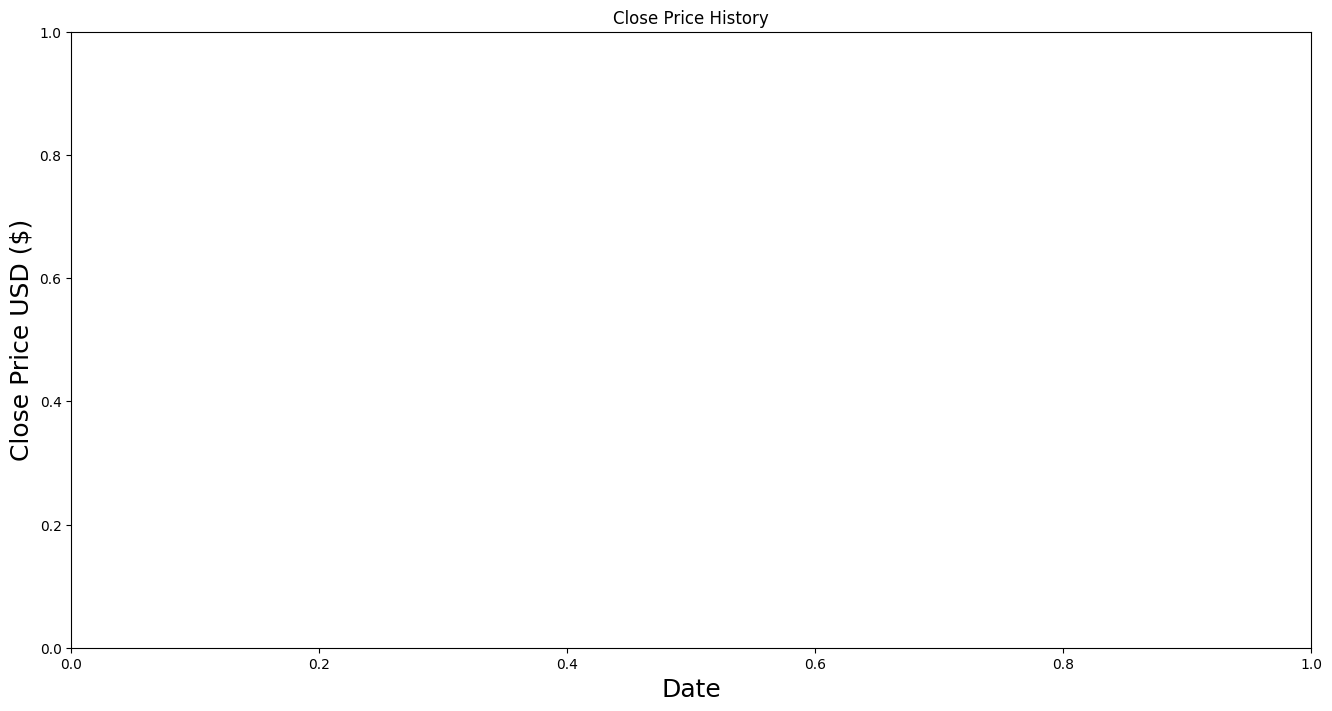

In [132]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [135]:
# Split the data
data_train, data_test = train_test_split(data, test_size=TEST_SIZE)

In [136]:
#print(data_test)

In [137]:
scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(data_train[['Close']])
data_test_scaled = scaler.transform(data_test[['Close']])

KeyError: "None of [Index(['Close'], dtype='object')] are in the [columns]"

In [ ]:
#print(data_test_scaled)

In [ ]:
# Create X and y for train and test sets
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(TIME_STEPS, data_train_scaled.shape[0]):
  X_train.append(data_train_scaled[i-TIME_STEPS:i, 0])
  y_train.append(data_train_scaled[i, 0])

for i in range(TIME_STEPS, data_test_scaled.shape[0]):
  X_test.append(data_test_scaled[i-TIME_STEPS:i, 0])
  y_test.append(data_test_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

NameError: name 'data_train_scaled' is not defined

In [ ]:
# Reshape the data to 3D for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test,  (X_test.shape[0],  X_test.shape[1], 1))
#X_test =  np.reshape(X_test, (X_test.shape +(1,)))

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
#print(X_train)

In [ ]:
#build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=64)

KeyError: 'pop from an empty set'

In [ ]:
# predict the close price using model
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

KeyError: 'pop from an empty set'

NameError: name 'y_true' is not defined

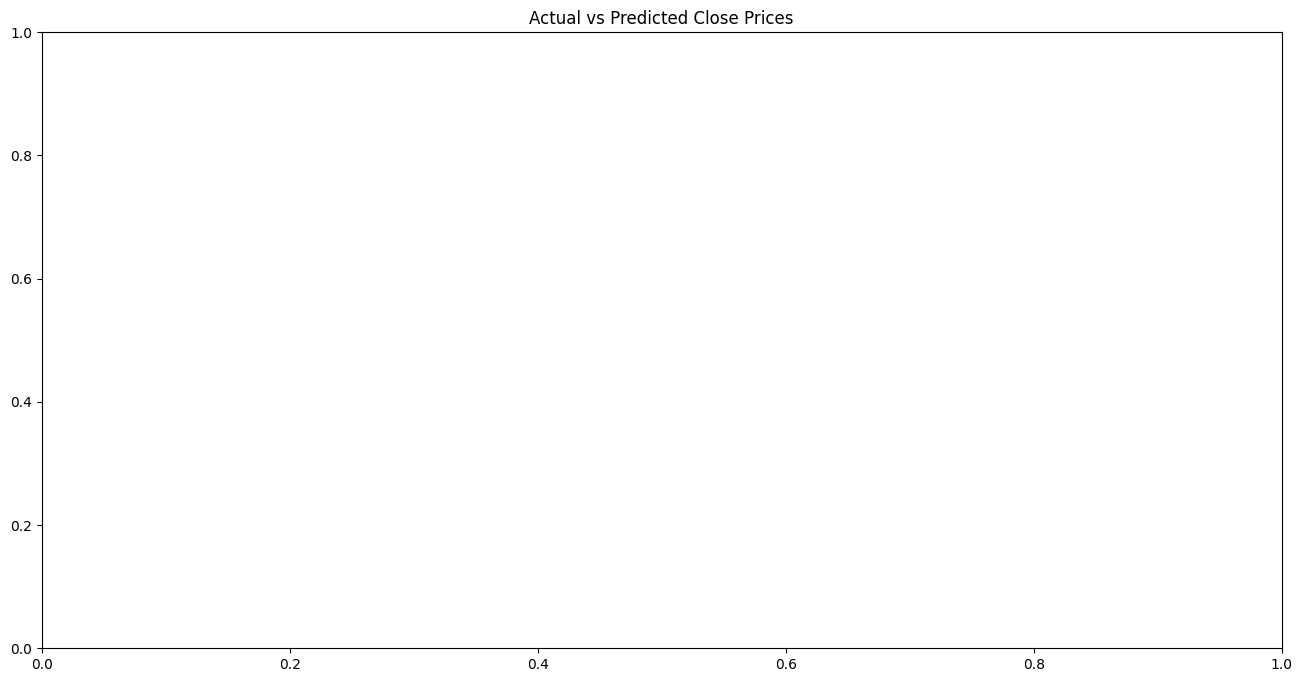

In [ ]:
# Plot the actual and predicted close prices
plt.figure(figsize=(16,8))
plt.title('Actual vs Predicted Close Prices')
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

In [ ]:
# calculate the SMAPE metric
smape = np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
print(f'SMAPE: {smape}')

NameError: name 'y_pred' is not defined

In [ ]:
# Suggest a strategy based on the predictions and the threshold
strategy = []
for i in range(len(y_pred)):
  if y_pred[i] > y_true[i] * (1 + THRESHOLD):
    strategy.append('Buy')
  elif y_pred[i] < y_true[i] * (1 - THRESHOLD):
    strategy.append('Sell')
  else:
    strategy.append('Hold')

NameError: name 'y_pred' is not defined

In [140]:
# Evaluate the strategy using accuracy metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(data_test['Strategy'][TIME_STEPS:], strategy) * 100
print(f'Accuracy: {accuracy}%')

KeyError: 'Strategy'

In [139]:
# Create a dataframe with the date, close price, prediction, and strategy
result = pd.DataFrame()
result['Date'] = data_test['Date'][TIME_STEPS:]
result['Close'] = y_true
result['Prediction'] = y_pred
result['Strategy'] = strategy
result.head()

KeyError: 'Date'

In [ ]:
for i in range(2, 5):
  print(i)

2
3
4
